In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from textwrap import wrap

First steps into making choropleths - from this article: [Geopandas - Ben Cooley](https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d)

## Data importing and cleaning

In [2]:
# Get GeoDataFrame containing London Borough geometry JSON polygons

fp = 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf'

# from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

map_df = gpd.read_file(fp)

map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


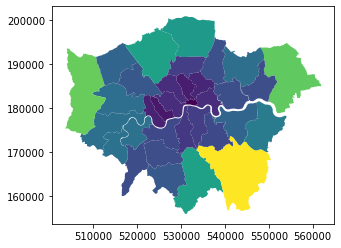

In [3]:
map_df.plot('HECTARES', legend=False)

In [4]:
# Get Borough-level profiles from London Datastore - has a variety of metrics/statistics

df =pd.read_excel('london-borough-profiles.xlsx', sheet_name='Data')# , skiprows=[0])

# from https://data.london.gov.uk/dataset/london-borough-profiles

df.drop(0, inplace=True)
df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
1,E09000001,E09000001,City of London,Inner London,8800.0,5325.81769,290.3934,30.303719,43.2,11.4,...,5.99,5.57,NaN,2.637945,128.833052,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.376723,3610.7817,57.882203,32.9,27.2,...,7.05,3.05,28.541953,7.272108,227.604933,Lab,0,100,0,36.497362
3,E09000003,E09000003,Barnet,Outer London,389600.0,151422.963691,8674.8314,44.911536,37.3,21.1,...,7.37,2.75,20.657931,6.026084,133.769632,Cons,50.793651,.,1.587302,40.480992
4,E09000004,E09000004,Bexley,Outer London,244300.0,97735.840946,6058.0668,40.326396,39.0,20.6,...,7.21,3.29,22.709307,6.859383,164.285871,Cons,71.428571,23.809524,0,39.630829
5,E09000005,E09000005,Brent,Outer London,332100.0,121048.274678,4323.2637,76.816966,35.6,20.9,...,7.22,2.92,24.344356,7.920348,169.356055,Lab,9.52381,88.888889,1.587302,36.271981


In [5]:
df.columns

Index(['Code', 'New code', 'Area name', 'Inner/ Outer London',
       'GLA Population Estimate 2017', 'GLA Household Estimate 2017',
       'Inland Area (Hectares)', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Proportion of population aged 0-15, 2015',
       'Proportion of population of working-age, 2015',
       'Proportion of population aged 65 and over, 2015',
       'Net internal migration (2015)', 'Net international migration (2015)',
       'Net natural change (2015)',
       '% of resident population born abroad (2015)',
       'Largest migrant population by country of birth (2011)',
       '% of largest migrant population (2011)',
       'Second largest migrant population by country of birth (2011)',
       '% of second largest migrant population (2011)',
       'Third largest migrant population by country of birth (2011)',
       '% of third largest migrant population (2011)',
       '% of population from BAME groups (2016)',
       '% people aged 3+

In [6]:
# Let's just take the features I'm interested in plotting

features = ['Area name', 'Population density (per hectare) 2017',
       'Average Age, 2017',
       'Teenage conception rate (2014)',
       '% of resident population born abroad (2015)',
       'Life satisfaction score 2011-14 (out of 10)',
       'Worthwhileness score 2011-14 (out of 10)',
       'Happiness score 2011-14 (out of 10)',
       'Anxiety score 2011-14 (out of 10)',
       'Childhood Obesity Prevalance (%) 2015/16',
       'People aged 17+ with diabetes (%)',
       'Mortality rate from causes considered preventable 2012/14',
       'Modelled Household median income estimates 2012/13',
       'Crime rates per thousand population 2014/15',
       'Median House Price, 2015',
       '% of area that is Greenspace, 2005',
       '% of adults who cycle at least once per month, 2014/15']

df = df[features]

In [21]:
# Let's make the column names nicer for manual plots

label_dict = {'Area name':'borough',
              'Population density (per hectare) 2017':'pop_density_per_hec',
              'Average Age, 2017':'ave_age',
              'Teenage conception rate (2014)':'teenage_conception_rate',
              '% of resident population born abroad (2015)':'first_gen_immigrant_prop',
              'Life satisfaction score 2011-14 (out of 10)':'life_satisfaction',
              'Worthwhileness score 2011-14 (out of 10)':'worthwhileness',
              'Happiness score 2011-14 (out of 10)':'happiness',
              'Anxiety score 2011-14 (out of 10)':'anxiety',
              'Childhood Obesity Prevalance (%) 2015/16':'childhood_obesity',
              'People aged 17+ with diabetes (%)':'adult_diabetes', 
              'Mortality rate from causes considered preventable 2012/14':'preventable_deaths',
              'Modelled Household median income estimates 2012/13':'median_income',
              'Crime rates per thousand population 2014/15':'crime_rate_per_1000',
              'Median House Price, 2015':'median_house_price',
              '% of area that is Greenspace, 2005':'greenspace',
              '% of adults who cycle at least once per month, 2014/15':'cycling_percentage'}

mapping_data = df.rename(columns=label_dict)

In [27]:
mapping_data

,borough,pop_density_per_hec,ave_age,teenage_conception_rate,first_gen_immigrant_prop,life_satisfaction,worthwhileness,happiness,anxiety,childhood_obesity,adult_diabetes,preventable_deaths,median_income,crime_rate_per_1000,median_house_price,greenspace,cycling_percentage
0,City of London,30.303719,43.2,20,20,6.59,7.08,5.99,5.57,25,2.637945,128.833052,63620,85,799999,4.8,16.853175
1,Barking and Dagenham,57.882203,32.9,32.4,37.8,7.14,7.60,7.05,3.05,28.541953,7.272108,227.604933,29420,83.35906,243500,33.6,8.780452
2,Barnet,44.911536,37.3,12.8,35.2,7.48,7.76,7.37,2.75,20.657931,6.026084,133.769632,40530,62.738426,445000,41.3,7.364569
3,Bexley,40.326396,39.0,19.5,16.1,7.38,7.70,7.21,3.29,22.709307,6.859383,164.285871,36990,51.827942,275000,31.7,10.557015
4,Brent,76.816966,35.6,18.5,53.9,7.25,7.35,7.22,2.92,24.344356,7.920348,169.356055,32140,78.801881,407250,21.9,7.873875
5,Bromley,21.840359,40.2,16.7,18.3,7.54,7.86,7.44,3.26,15.998786,5.242389,148.495392,43060,64.133577,374975,57.8,12.976754
6,Camden,111.293183,36.4,16.8,41.4,7.14,7.38,7.11,3.61,21.326676,3.858989,163.751612,43750,123.498709,700000,24.8,18.81814
7,Croydon,44.680203,37.0,28.4,29.4,7.10,7.57,7.18,3.30,24.481434,6.483704,178.212282,37000,77.035133,300000,37.1,12.760424
8,Ealing,63.300819,36.2,17.8,47.4,7.29,7.57,7.26,3.57,23.822792,6.919389,163.540922,36070,75.475775,430000,30.9,15.035813
9,Enfield,41.196571,36.3,24.6,35,7.26,7.57,7.33,2.60,25.187873,7.042382,151.968042,33110,69.3739,320000,45.6,7.882716


In [23]:
# Drop high level rows, only want Borough data, not country etc.

mapping_data = mapping_data.set_index('borough').drop(['Inner London','Outer London','London',
                                                       'England','United Kingdom','National comparator'], 
                                                      axis=0).reset_index()

In [26]:
mapping_data.loc[0, 'crime_rate_per_1000'] = 85      # Some City of London data is missing, let's impute reasonable values 
mapping_data.loc[0, 'teenage_conception_rate'] = 20  # This is obviously not great practice but not important for a visual
mapping_data.loc[0, 'first_gen_immigrant_prop'] = 20 # and if I share any of these features' choropleths, I will investigate further 
mapping_data.loc[0, 'childhood_obesity'] = 25 

In [198]:
# Let's join our Geo and regular dataframes so we can plot with the data

In [34]:
list(merged.columns)

['GSS_CODE',
 'HECTARES',
 'NONLD_AREA',
 'ONS_INNER',
 'SUB_2009',
 'SUB_2006',
 'geometry',
 'pop_density_per_hec',
 'ave_age',
 'teenage_conception_rate',
 'first_gen_immigrant_prop',
 'life_satisfaction',
 'worthwhileness',
 'happiness',
 'anxiety',
 'childhood_obesity',
 'adult_diabetes',
 'preventable_deaths',
 'median_income',
 'crime_rate_per_1000',
 'median_house_price',
 'greenspace',
 'cycling_percentage']

In [38]:
# Drop unused columns from GIS data

merged = map_df.set_index('NAME').join(mapping_data.set_index('borough')).drop(['GSS_CODE',
                                                                                'HECTARES',
                                                                                'NONLD_AREA',
                                                                                'ONS_INNER',
                                                                                'SUB_2009',
                                                                                'SUB_2006'], axis=1)

merged.head()

,geometry,pop_density_per_hec,ave_age,teenage_conception_rate,first_gen_immigrant_prop,life_satisfaction,worthwhileness,happiness,anxiety,childhood_obesity,adult_diabetes,preventable_deaths,median_income,crime_rate_per_1000,median_house_price,greenspace,cycling_percentage
NAME,,,,,,,,,,,,,,,,,
Kingston upon Thames,"POLYGON ((516401.600 160201.800, 516407.300 16...",47.073125,37.1,15.3,29.8,7.34,7.68,7.41,3.29,16.905615,4.855511,140.584911,43940,58.455691,410000,36.4,20.448069
Croydon,"POLYGON ((535009.200 159504.700, 535005.500 15...",44.680203,37.0,28.4,29.4,7.10,7.57,7.18,3.30,24.481434,6.483704,178.212282,37000,77.035133,300000,37.1,12.760424
Bromley,"POLYGON ((540373.600 157530.400, 540361.200 15...",21.840359,40.2,16.7,18.3,7.54,7.86,7.44,3.26,15.998786,5.242389,148.495392,43060,64.133577,374975,57.8,12.976754
Hounslow,"POLYGON ((521975.800 178100.000, 521967.700 17...",48.983606,35.8,25,46.3,7.31,7.62,7.40,3.39,24.091261,6.480170,165.832643,35330,79.155663,355000,39.6,16.034358
Ealing,"POLYGON ((510253.500 182881.600, 510249.900 18...",63.300819,36.2,17.8,47.4,7.29,7.57,7.26,3.57,23.822792,6.919389,163.540922,36070,75.475775,430000,30.9,15.035813


## Geopandas and matplotlib plotting

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


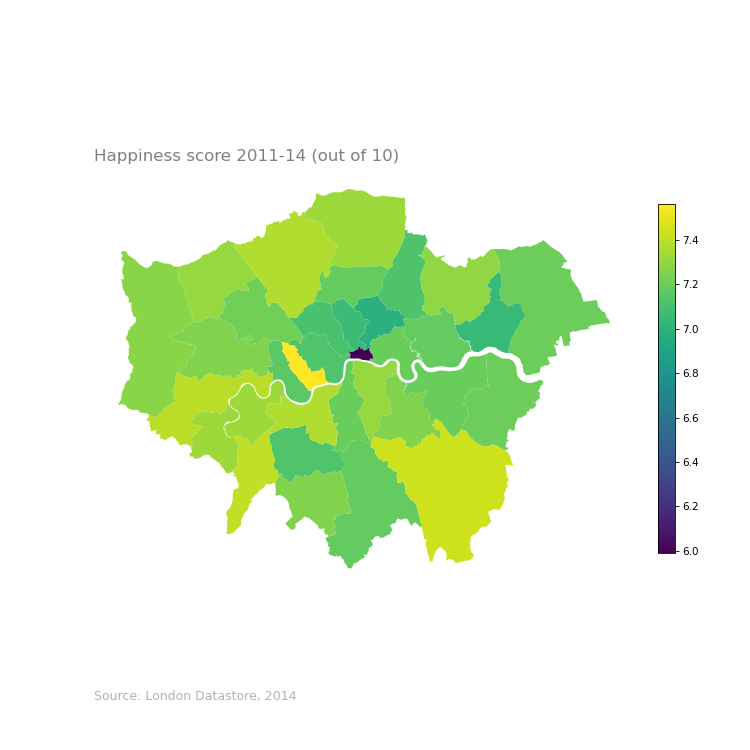

In [68]:
# Let's make some choropleths, manually selecting features

fig, ax = plt.subplots(1, figsize=(10, 10))

target='happiness' # Change target variable here to one of the renamed columns to plot that data
index=list(label_dict.values()).index(target)
title = list(label_dict.keys())[index]

vmin, vmax = (min(merged[target]), max(merged[target]))

cmap_name = 'viridis'

merged.plot(column=target, cmap=cmap_name, ax=ax)

ax.axis('off')

ax.set_title(title, fontdict={'fontsize':'16', 'fontweight':3}, alpha=0.5, ha='left',va='bottom', position=(0,1))

ax.annotate('Source: London Datastore, 2014', xy=(0.125, 0.08), xycoords='figure fraction', ha='left', va='top', 
            fontsize=12, alpha=0.3)

sm = plt.cm.ScalarMappable(cmap=cmap_name, norm = plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []

cbar = fig.colorbar(sm, fraction=0.030, pad=0.04)

In [69]:
fig.savefig('happiness.png', dpi=300)

In [41]:
# Put it all in a function for some grid-subplots

def plot_boroughs(target='happiness', cmap_name='viridis', df=merged, ax=ax):
    
    index=list(label_dict.values()).index(target)
    
    title = list(label_dict.keys())[index]

    vmin, vmax = (min(df[target]), max(df[target]))

    df.plot(column=target, cmap=cmap_name, ax=ax)

    ax.axis('off')
    
    # Use wrap to ensure title texts wraps before going off the axis

    ax.set_title('\n'.join(wrap(title,30)), fontdict={'fontsize':'12', 'fontweight':3}, alpha=0.5, ha='left', position=(0,1))

    ax.annotate('Source: London Datastore, 2014', xy=(0.1, 0.08), xycoords='figure fraction', ha='left', va='top', 
                fontsize=10, alpha=0.06)

    sm = plt.cm.ScalarMappable(cmap=cmap_name, norm = plt.Normalize(vmin=vmin, vmax=vmax))

    sm._A = []

    fig.colorbar(sm, fraction=0.030, pad=0.04, ax=ax) #frac 46

<IPython.core.display.Javascript object>


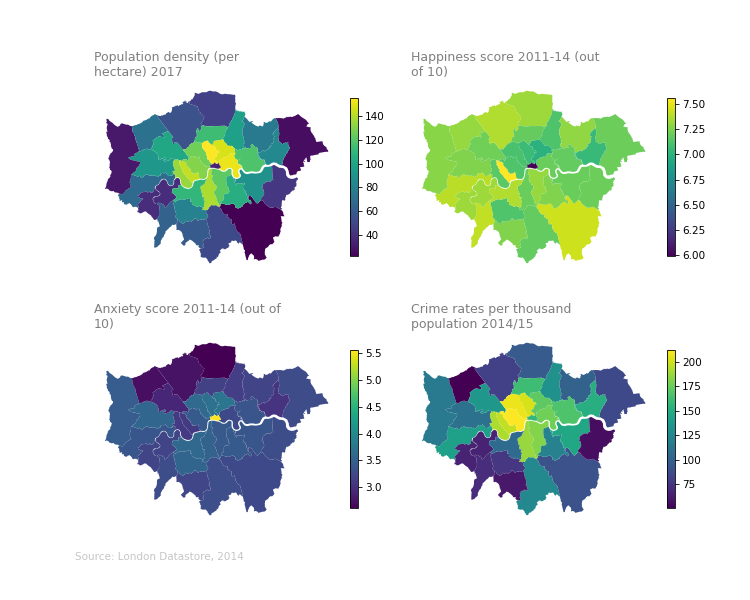

In [42]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))

In [43]:
plot_list = ['pop_density_per_hec','happiness','anxiety','crime_rate_per_1000'] 

for axis, feature in zip(axes.reshape(-1), plot_list):

    plot_boroughs(target=feature, ax = axis)

<IPython.core.display.Javascript object>


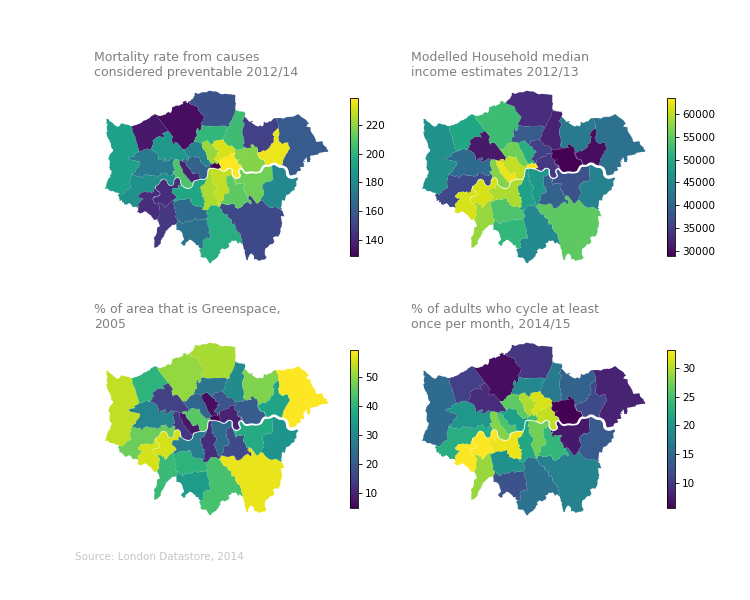

In [70]:
fig2, axes2 = plt.subplots(2,2, figsize=(10, 8))

In [71]:
plot_list2 = ['preventable_deaths','median_income','greenspace','cycling_percentage']

for axis, feature in zip(axes2.reshape(-1), plot_list2):

    plot_boroughs(target=feature, ax = axis)
    

<IPython.core.display.Javascript object>


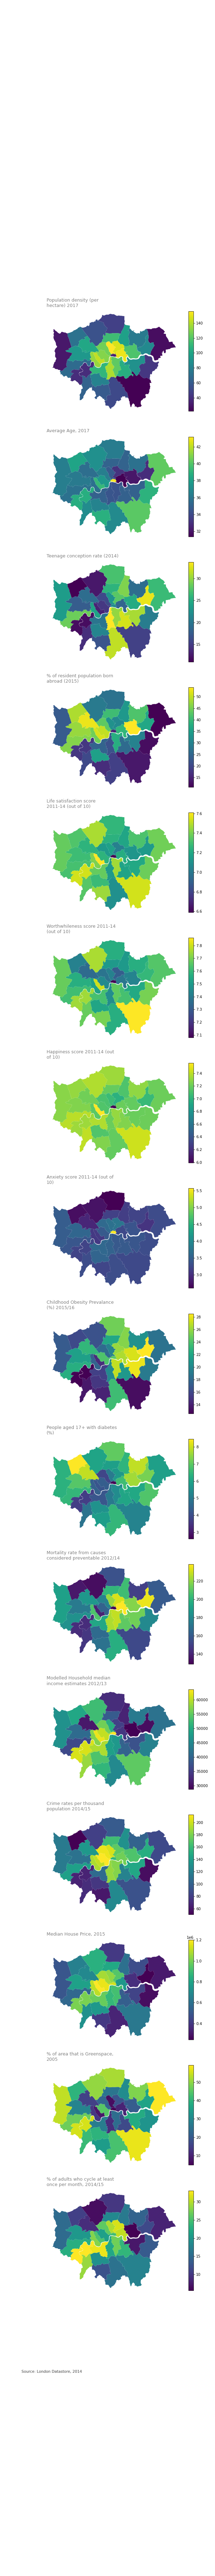

In [72]:
# Let's look at all of the features of interest

fig3, axes3 = plt.subplots((len(merged.columns)-1),1, figsize=(8, ((len(merged.columns)-1)*6)), constrained_layout=True)
                                                   
                                                   
                                                   

In [73]:
for axis, feature in zip(axes3.reshape(-1), list(merged.columns)[1:]):
    
    plot_boroughs(target=feature, ax = axis)